In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [25]:
df = pd.read_csv("/content/drive/MyDrive/support_cases.csv")

In [24]:
print("Shape:", df.shape)
print("Null values:\n", df.isnull().sum())

Shape: (100, 3)
Null values:
 message_length    0
response_time     0
case_type         0
dtype: int64


In [13]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in message_length: 0
Outliers in response_time: 0


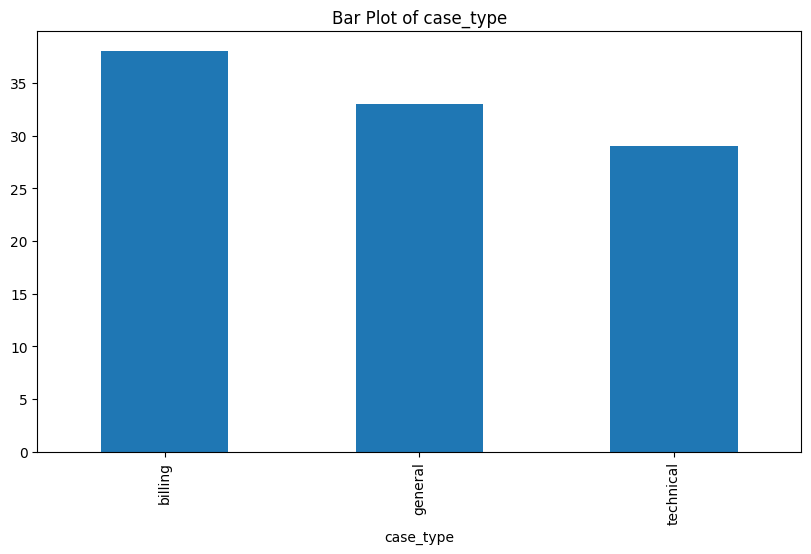

In [28]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 3)
for col in df.select_dtypes(include='object').columns:
    df[col].value_counts().plot(kind='bar', ax=plt.gca())
    plt.title(f"Bar Plot of {col}")
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Box Plot')

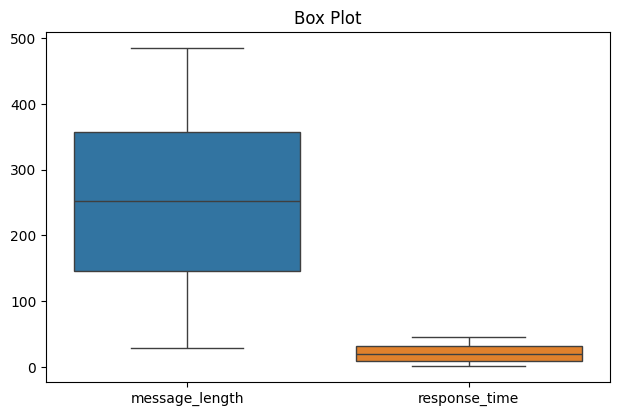

In [7]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 2)
sns.boxplot(data=df[numerical_cols])
plt.title("Box Plot")


Text(0.5, 1.0, 'Area Plot')

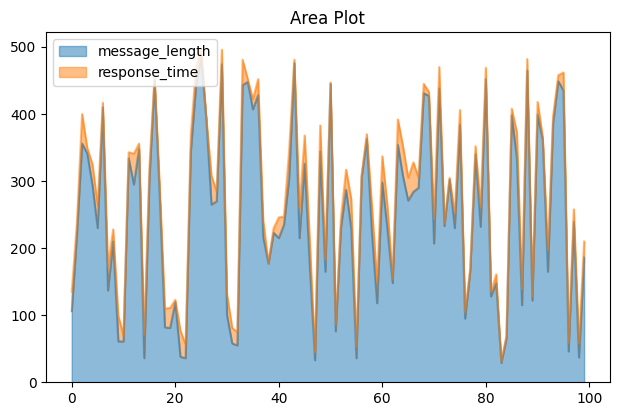

In [27]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
df[numerical_cols].plot.area(ax=plt.gca(), alpha=0.5)
plt.title("Area Plot")

In [12]:
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

X = df_encoded.iloc[:, :-1]
y = df_encoded.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.55


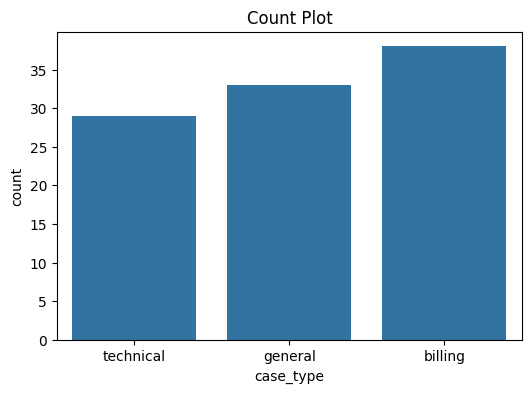

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df.select_dtypes(include='object').columns[0], data=df)
plt.title("Count Plot")
plt.show()

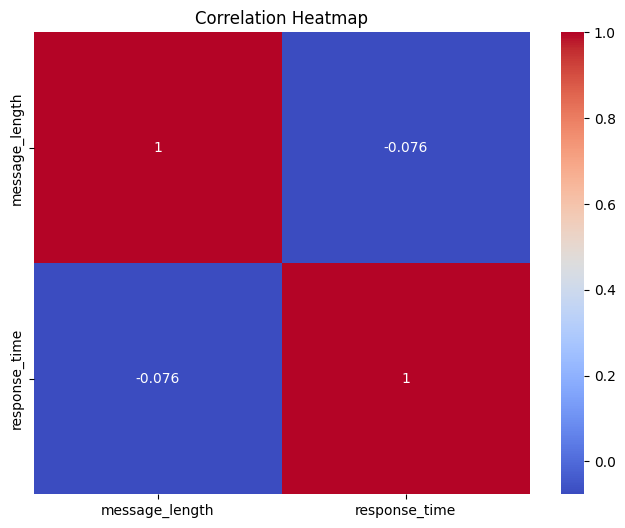

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

<Figure size 600x400 with 0 Axes>

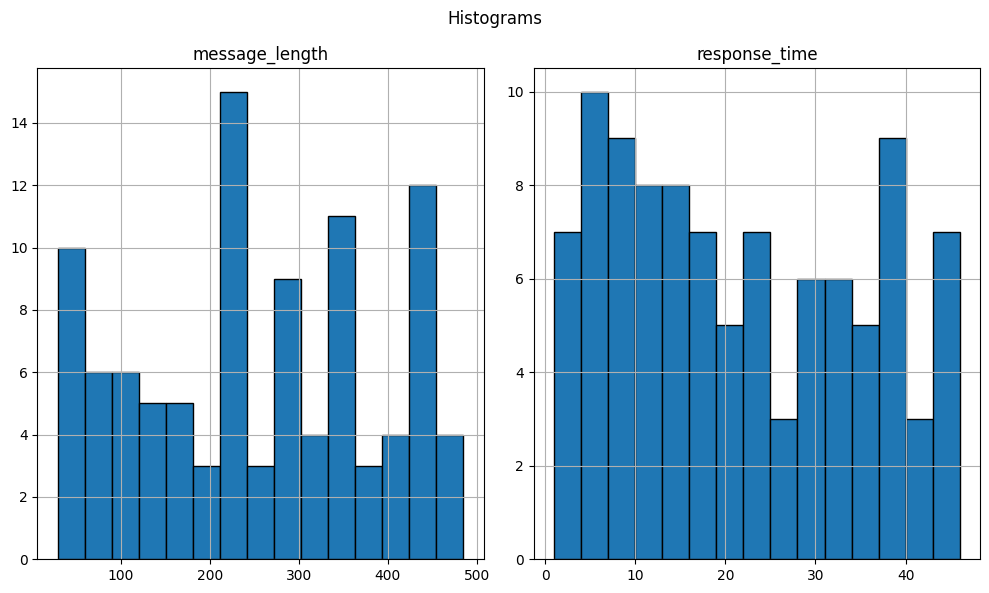

In [22]:
df[numerical_cols].hist(figsize=(10, 6), bins=15, edgecolor='black')
plt.suptitle("Histograms")
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

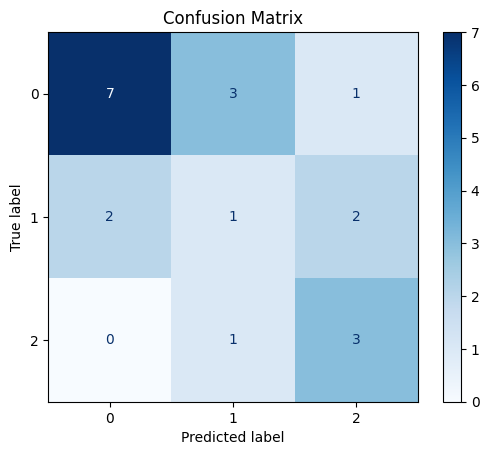

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()